<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
            </font>
			<p></p>
			<font color=blue>
آمار و احتمال مهندسی
            </font>
			<br />
			<br />
Spring 1401        </div>
		<hr/>
		<font color=red size=6>
			<br />
			<div align=center>
EDA (Exploratory Data Analysis)
            </div>
		</font>
		<br />
		<div align=center>
Alireza noroozi
        </div>
	</font>
</div>

# Warm-up

with 'salaries' data that is about proffessors income, we have plotted these pictures, now you should retrival the R code of these plots and speak a few words about what you see and understand from them.

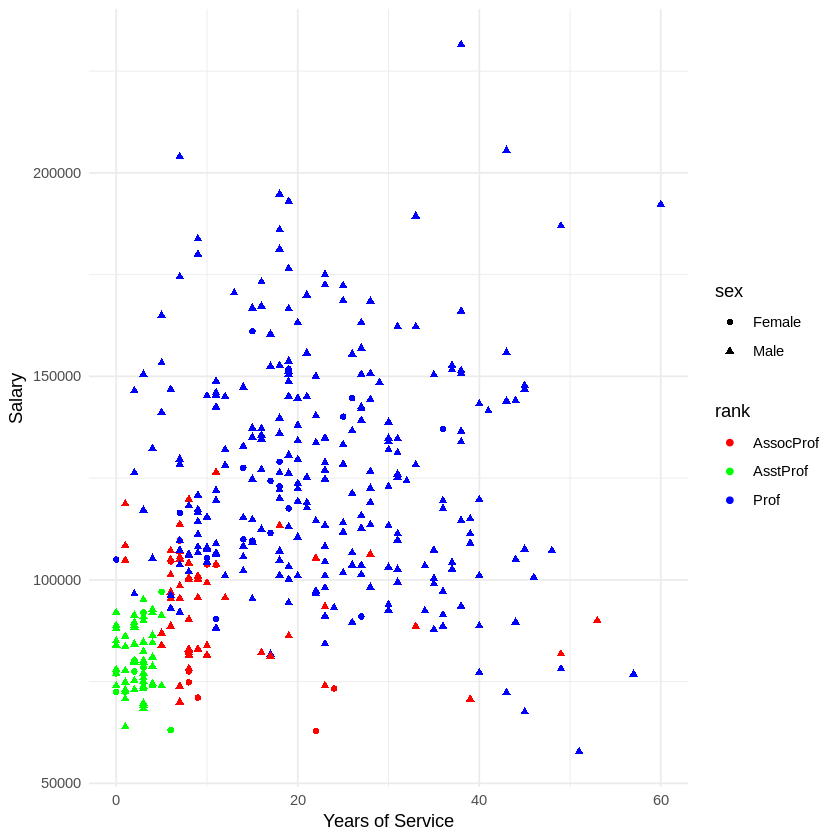

In [2]:
# Load necessary library
library(ggplot2)
salaries <-  read.csv("Salaries.csv", header=TRUE)
# Assuming 'salaries' is the dataframe with relevant data
ggplot(salaries, aes(x = yrs.service, y = salary, color = rank, shape = sex)) +
  geom_point() +
  scale_color_manual(values = c("red", "green", "blue")) +  # Assign colors to ranks
  labs(x = "Years of Service", y = "Salary") +
  theme_minimal()


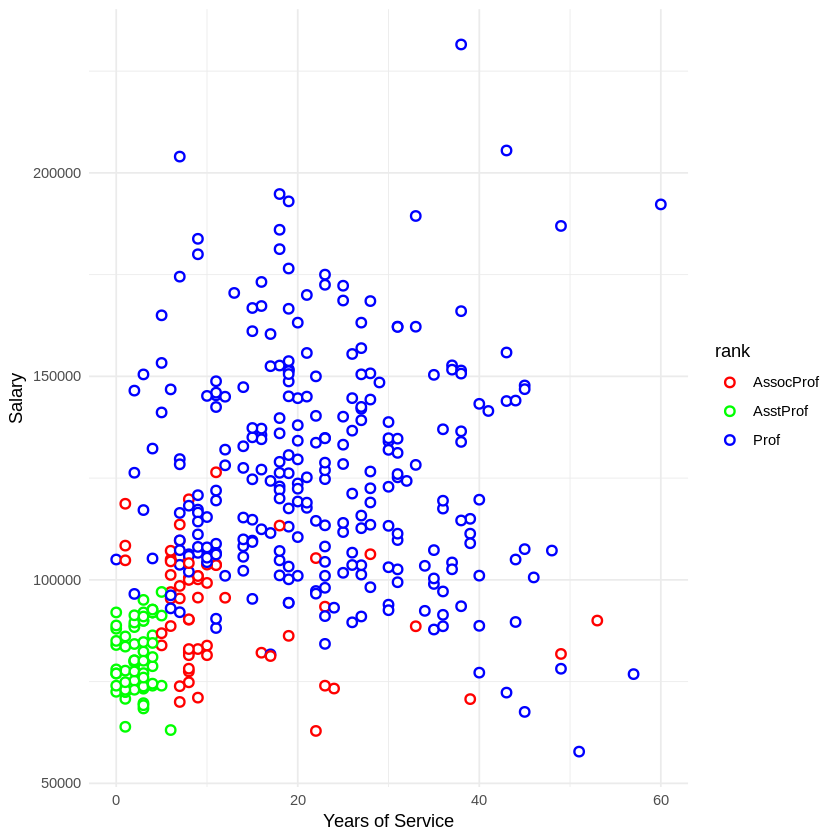

In [3]:
# Load necessary library
library(ggplot2)

# Scatter plot without gender differentiation
ggplot(salaries, aes(x = yrs.service, y = salary, color = rank)) +
  geom_point(shape = 21, fill = "white", size = 2, stroke = 1) +  # Hollow circles
  scale_color_manual(values = c("red", "green", "blue")) +  # Assign colors
  labs(x = "Years of Service", y = "Salary") +
  theme_minimal()


<div id="sec_t1" style="direction:rtl;line-height:300%;">
        <img src="figs/Rplot2.png" style="float:center; width:60%"/>
        <br>
        <img src="figs/Rplot1.png" style="float:center; width:60%;"/>
</div>

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

<div id="sec_t1" style="direction:rtl;line-height:300%;">
        <img src="figs/The-fundamental-steps-of-the-exploratory-data-analysis-process.png" style="float:center; width:60%"/>
    
</div>

Read the dataset and show 10 first row of it.

In [6]:
# Load necessary library
library(tidyverse)

# Read the dataset (assuming it's a CSV file named "salaries.csv")
salaries <- read.csv("Salaries.csv")

# Display the first 10 rows
head(salaries, 10)


,X,rank,discipline,yrs.since.phd,yrs.service,sex,salary
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,1,Prof,B,19,18,Male,139750
2,2,Prof,B,20,16,Male,173200
3,3,AsstProf,B,4,3,Male,79750
4,4,Prof,B,45,39,Male,115000
5,5,Prof,B,40,41,Male,141500
6,6,AssocProf,B,6,6,Male,97000
7,7,Prof,B,30,23,Male,175000
8,8,Prof,B,45,45,Male,147765
9,9,Prof,B,21,20,Male,119250


call summary function on data and see what you can understand from the output and explain about difference between categorical and numerical data column.

In [8]:
# Display summary of the dataset
summary(salaries)


       X           rank            discipline        yrs.since.phd  
 Min.   :  1   Length:397         Length:397         Min.   : 1.00  
 1st Qu.:100   Class :character   Class :character   1st Qu.:12.00  
 Median :199   Mode  :character   Mode  :character   Median :21.00  
 Mean   :199                                         Mean   :22.31  
 3rd Qu.:298                                         3rd Qu.:32.00  
 Max.   :397                                         Max.   :56.00  
  yrs.service        sex                salary      
 Min.   : 0.00   Length:397         Min.   : 57800  
 1st Qu.: 7.00   Class :character   1st Qu.: 91000  
 Median :16.00   Mode  :character   Median :107300  
 Mean   :17.61                      Mean   :113706  
 3rd Qu.:27.00                      3rd Qu.:134185  
 Max.   :60.00                      Max.   :231545  

Understanding the Summary Output
Numerical Columns:

    yrs.since.phd (Years Since PhD)
        Min: 1 year, Max: 56 years
        Median: 21 years, Mean: 22.31 years
        The distribution suggests that most professors have around 21–22 years of experience since earning their PhD.

    yrs.service (Years of Service)
        Min: 0 years, Max: 60 years
        Median: 16 years, Mean: 17.61 years
        The range is quite large, from new hires (0 years) to senior faculty with 60 years of service.

    salary
        Min: $57,800, Max: $231,545
        Median: $107,300, Mean: $113,706
        The distribution is right-skewed, meaning some professors earn significantly higher salaries than others.

Categorical Columns:

    rank (Professorship Rank)
        Stored as a character variable, meaning it contains text (e.g., "Assistant Prof", "Assoc Prof", "Prof").
        We might need to convert it into a factor variable for better analysis.

    discipline (Academic Discipline)
        Another character variable, possibly representing different subject areas.
        If it has few unique values, we should treat it as a factor.

    sex (Gender)
        Also a character variable, likely containing values like "Male" and "Female".
        Converting this into a factor can help in statistical modeling.

Key Observations:

    The median salary ($107,300) is lower than the mean ($113,706), suggesting that some professors earn very high salaries, pulling the average up.
    Years of experience varies widely, with some professors having over 50 years of experience.
    There are categorical variables (rank, discipline, sex) that should be converted into factors for analysis.

# dealing with NA's

In R, NA stands for Not Available. Each cell of your data that displays NA is a missing value. there are several ways for dealing with them, like omit those rows or fill them with relative data's like mean or zero or median.
now in this part we want you to fill na values of column 'car' with median and other columns with mean and call summary function again.

In [9]:
# Load necessary library
library(dplyr)

# Replace NA values in 'car' column with its median
salaries$car[is.na(salaries$car)] <- median(salaries$car, na.rm = TRUE)

# Replace NA values in other columns with their respective means
salaries <- salaries %>%
  mutate(across(where(is.numeric), ~ replace(., is.na(.), mean(., na.rm = TRUE))))

# Display summary again
summary(salaries)


       X           rank            discipline        yrs.since.phd  
 Min.   :  1   Length:397         Length:397         Min.   : 1.00  
 1st Qu.:100   Class :character   Class :character   1st Qu.:12.00  
 Median :199   Mode  :character   Mode  :character   Median :21.00  
 Mean   :199                                         Mean   :22.31  
 3rd Qu.:298                                         3rd Qu.:32.00  
 Max.   :397                                         Max.   :56.00  
  yrs.service        sex                salary      
 Min.   : 0.00   Length:397         Min.   : 57800  
 1st Qu.: 7.00   Class :character   1st Qu.: 91000  
 Median :16.00   Mode  :character   Median :107300  
 Mean   :17.61                      Mean   :113706  
 3rd Qu.:27.00                      3rd Qu.:134185  
 Max.   :60.00                      Max.   :231545  

# different plots, which plot for wich column?
for each plot choose propper features and draw each plot.
## Bar Plot
A bar plot is a plot that presents categorical data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

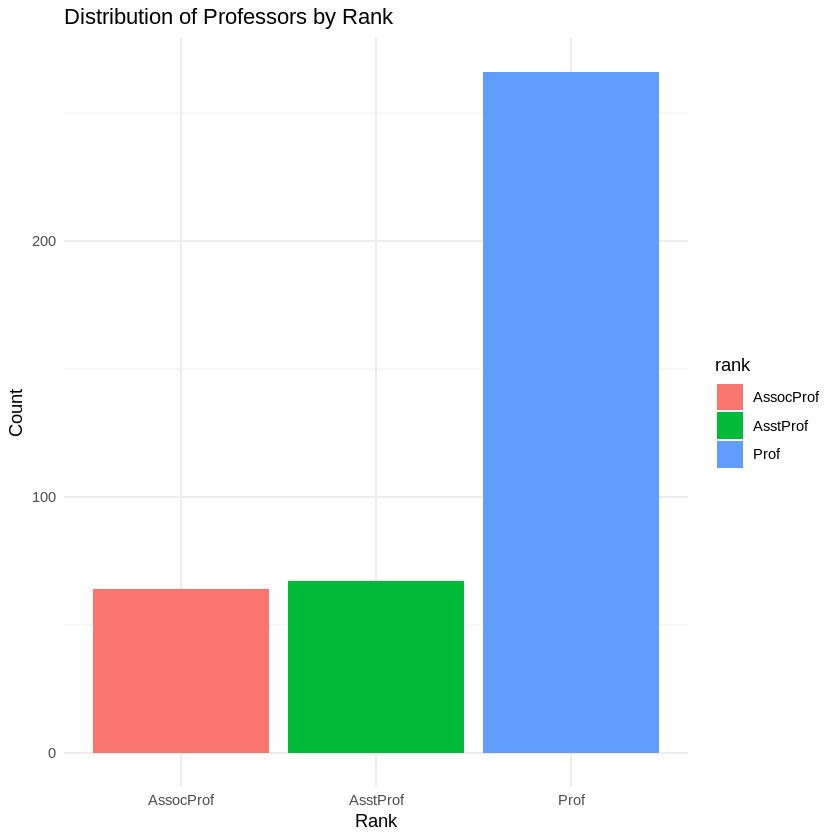

In [10]:
library(ggplot2)

# Bar plot of professor rank
ggplot(salaries, aes(x = rank, fill = rank)) +
  geom_bar() +
  labs(title = "Distribution of Professors by Rank", x = "Rank", y = "Count") +
  theme_minimal()


## Scatter Plot
A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

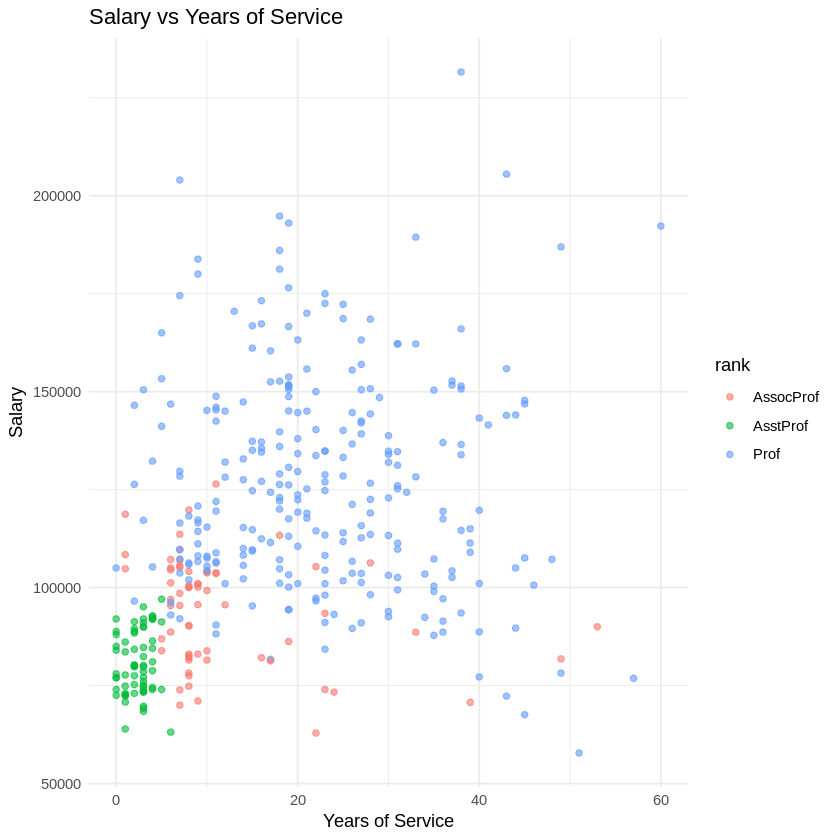

In [13]:
# Scatter plot of salary vs years of service
ggplot(salaries, aes(x = yrs.service, y = salary, color = rank)) +
  geom_point(alpha = 0.6) +
  labs(title = "Salary vs Years of Service", x = "Years of Service", y = "Salary") +
  theme_minimal()


## Histogram
A histogram is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data.

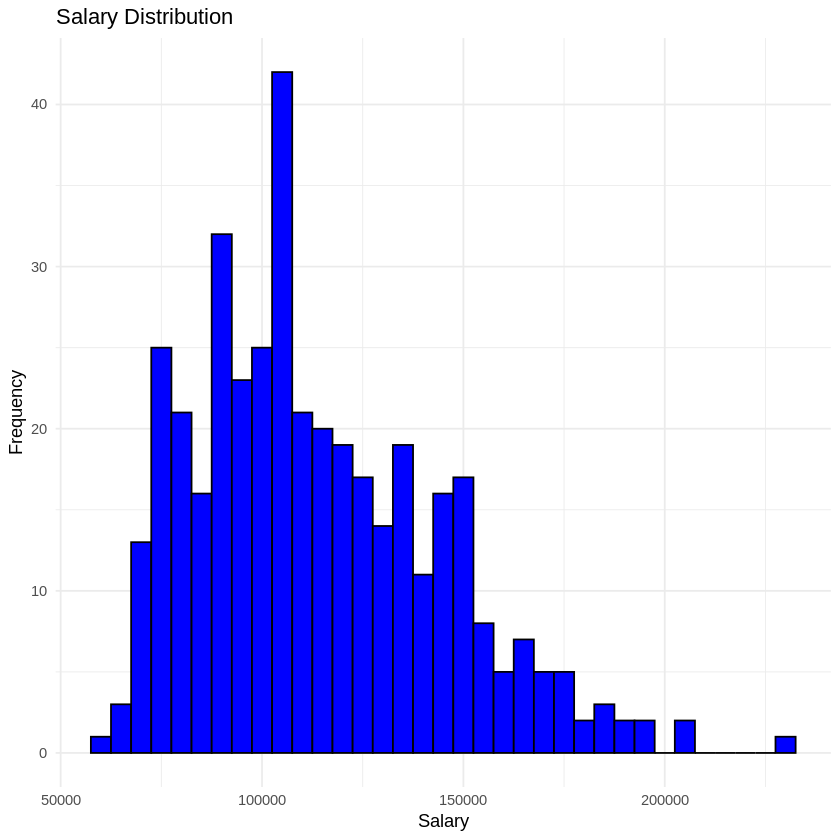

In [12]:
# Histogram of salaries
ggplot(salaries, aes(x = salary)) +
  geom_histogram(binwidth = 5000, fill = "blue", color = "black") +
  labs(title = "Salary Distribution", x = "Salary", y = "Frequency") +
  theme_minimal()


## Density Plot
A density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable
. It is a smoothed version of the histogram and is used in the same concept.

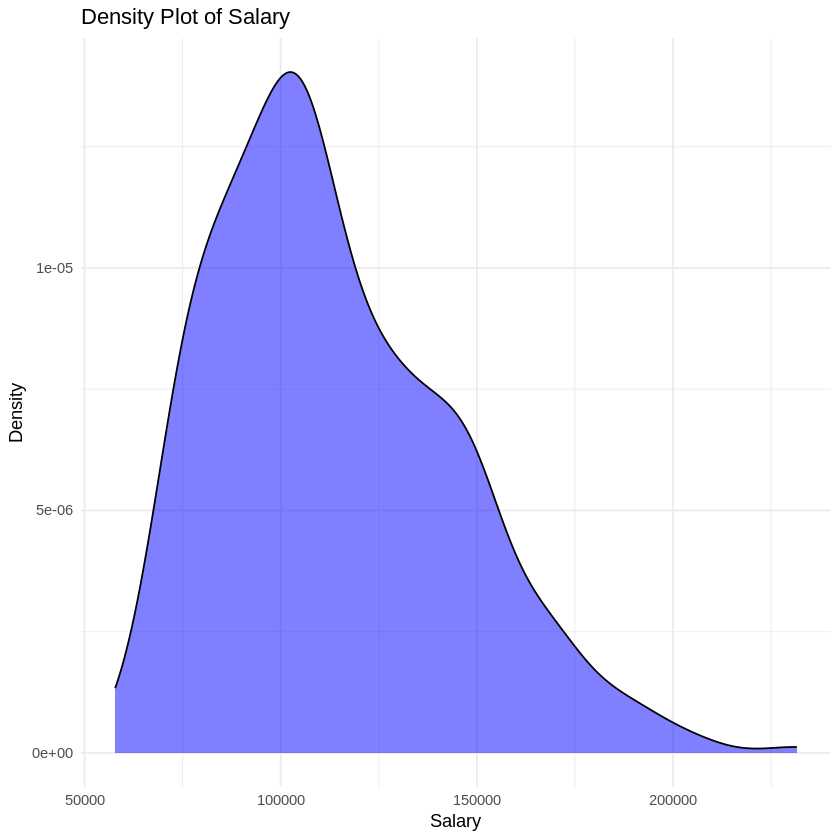

In [14]:
# Density plot for salary
ggplot(salaries, aes(x = salary)) +
  geom_density(fill = "blue", alpha = 0.5) +
  labs(title = "Density Plot of Salary", x = "Salary", y = "Density") +
  theme_minimal()


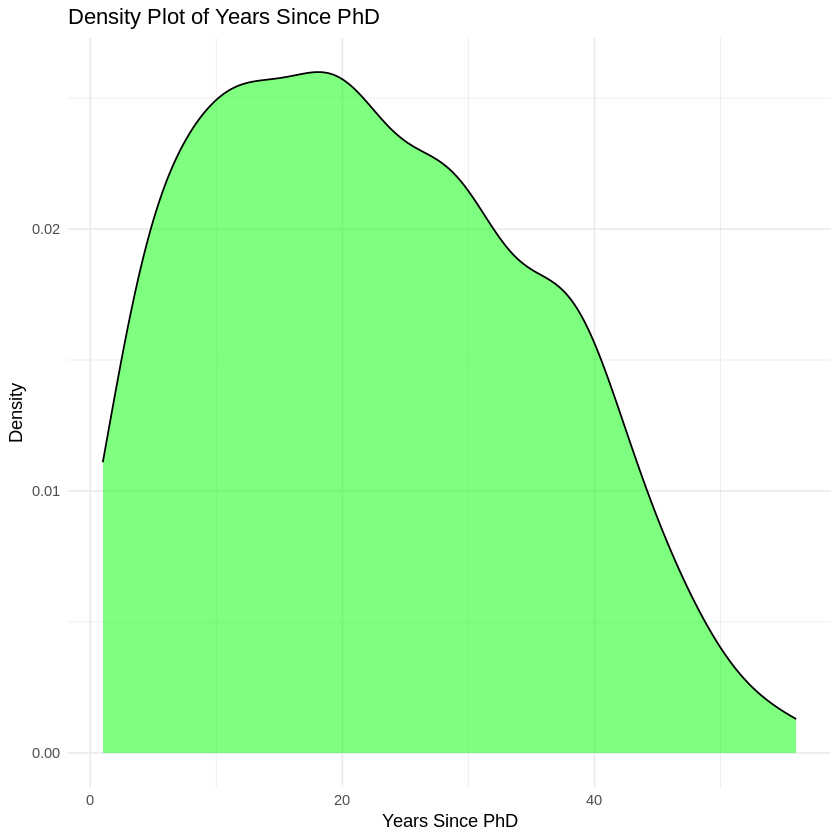

In [15]:
# Density plot for years since PhD
ggplot(salaries, aes(x = yrs.since.phd)) +
  geom_density(fill = "green", alpha = 0.5) +
  labs(title = "Density Plot of Years Since PhD", x = "Years Since PhD", y = "Density") +
  theme_minimal()


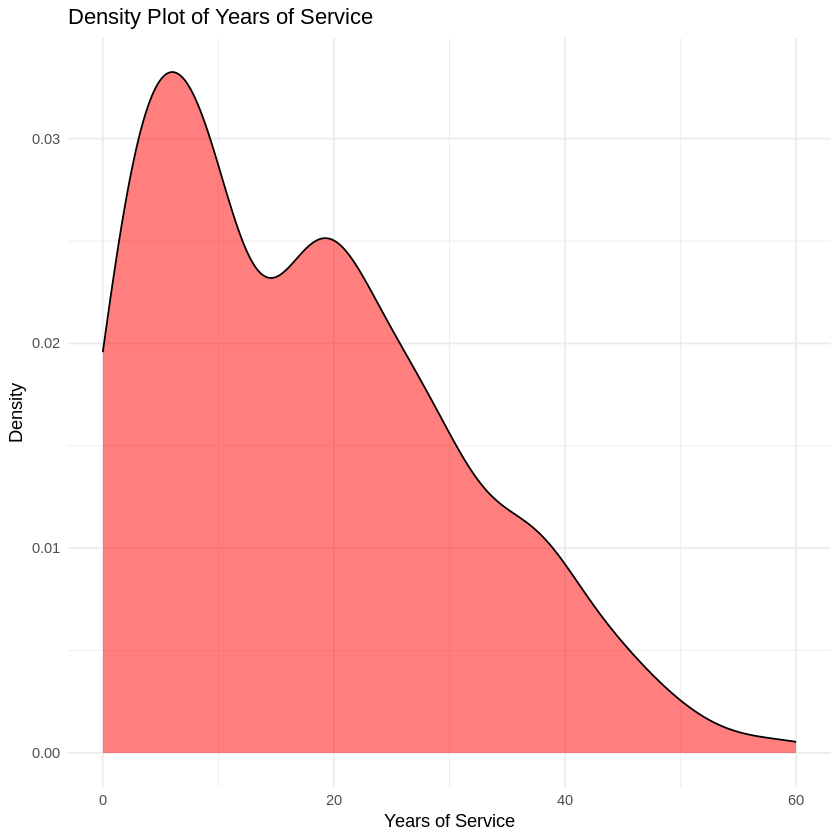

In [16]:
# Density plot for years of service
ggplot(salaries, aes(x = yrs.service)) +
  geom_density(fill = "red", alpha = 0.5) +
  labs(title = "Density Plot of Years of Service", x = "Years of Service", y = "Density") +
  theme_minimal()


## Trend Plot
Trend plots are used to illustrate how a random variable may change over time (e.g. sales, exchange rates, stick prices). In order to create a Trend plot one must first have defined a set of cells as an input or output array.

`geom_smooth()` using formula = 'y ~ x'


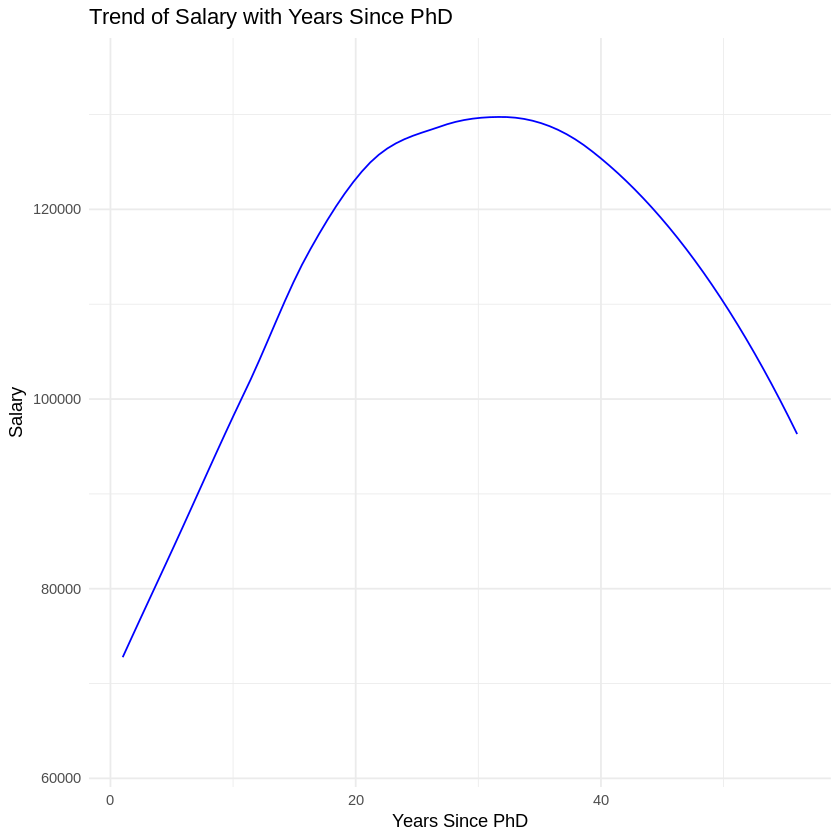

In [17]:
# Trend plot: Salary vs. Years Since PhD
ggplot(salaries, aes(x = yrs.since.phd, y = salary)) +
  geom_line(stat = "smooth", method = "loess", color = "blue") +
  labs(title = "Trend of Salary with Years Since PhD", x = "Years Since PhD", y = "Salary") +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


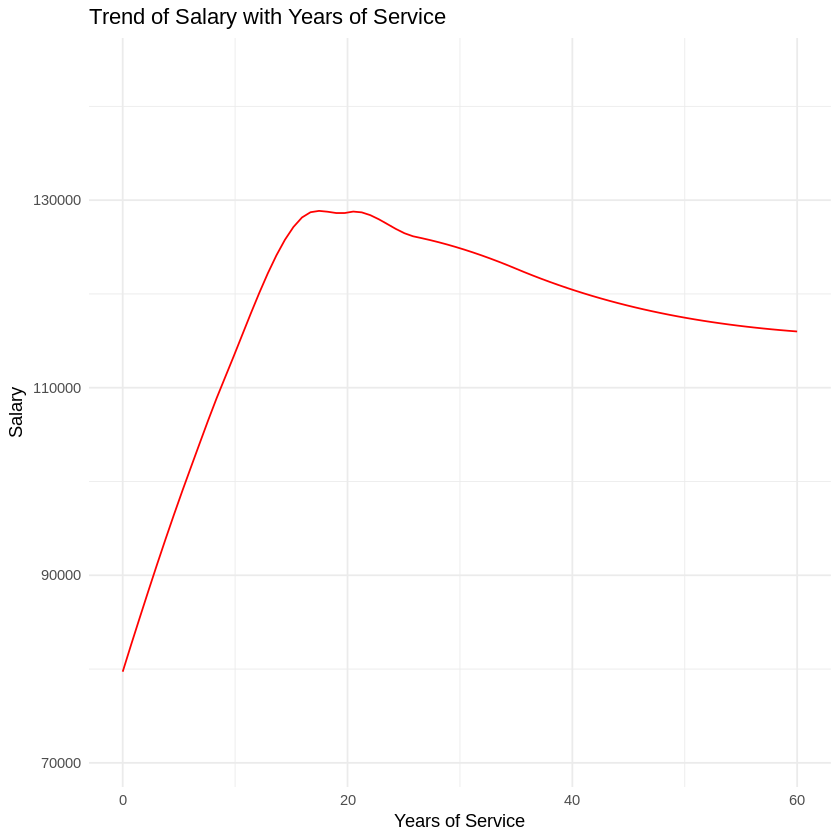

In [18]:
# Trend plot: Salary vs. Years of Service
ggplot(salaries, aes(x = yrs.service, y = salary)) +
  geom_line(stat = "smooth", method = "loess", color = "red") +
  labs(title = "Trend of Salary with Years of Service", x = "Years of Service", y = "Salary") +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


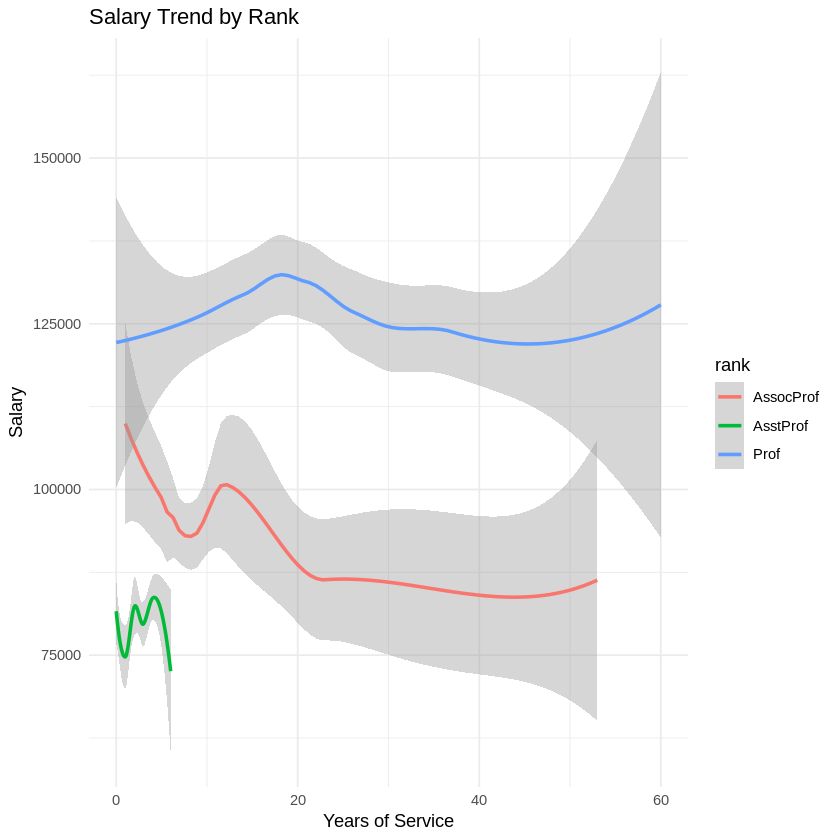

In [19]:
# Salary trend by rank
ggplot(salaries, aes(x = yrs.service, y = salary, color = rank)) +
  geom_smooth(method = "loess") +
  labs(title = "Salary Trend by Rank", x = "Years of Service", y = "Salary") +
  theme_minimal()
